# Import libraries

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf


# Import Dataset

In [ ]:
df=pd.read_csv('forestfires.csv')
df

# I am dropping the month and day column because they already have dummy variables.hence i am dropping them

In [45]:
df.drop(columns=['month','day'],inplace=True)
df

##I am taking small as 0 and large as 1

In [ ]:

df.loc[df["size_category"]=='small','size_category']=0
df.loc[df["size_category"]=='large','size_category']=1
df["size_category"].value_counts()

# split into input (X) and output (Y) variables

In [48]:
X = df.iloc[:,0:28]
Y = df.iloc[:,28]

# Dataset contains different datatypes which cause erros in tensorflow so we need convert it into one datatype.so i done it with using 'convert_to_tensor' Library

In [61]:
X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(Y, dtype=tf.float32)


# Importing Tesorflow libraries

In [62]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [63]:
model = Sequential()
model.add(Dense(42, input_dim=28,  activation='relu')) #input layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Fitting

In [65]:
history = model.fit(X_tensor,Y_tensor, validation_split=0.30, epochs=500, batch_size=200)

Epoch 1/500
2/2 [==============================] - 1s 245ms/step - loss: 34.1990 - accuracy: 0.2465 - val_loss: 11.4118 - val_accuracy: 0.4744
Epoch 2/500
2/2 [==============================] - 0s 33ms/step - loss: 25.9972 - accuracy: 0.2521 - val_loss: 8.9902 - val_accuracy: 0.4744
Epoch 3/500
2/2 [==============================] - 0s 55ms/step - loss: 17.5270 - accuracy: 0.2742 - val_loss: 8.6045 - val_accuracy: 0.5705
Epoch 4/500
2/2 [==============================] - 0s 51ms/step - loss: 10.2580 - accuracy: 0.3684 - val_loss: 9.8568 - val_accuracy: 0.5769
Epoch 5/500
2/2 [==============================] - 0s 36ms/step - loss: 5.6507 - accuracy: 0.4543 - val_loss: 11.8564 - val_accuracy: 0.6410
Epoch 6/500
2/2 [==============================] - 0s 41ms/step - loss: 4.3223 - accuracy: 0.6316 - val_loss: 14.2380 - val_accuracy: 0.6346
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 4.9499 - accuracy: 0.7036 - val_loss: 16.1596 - val_accuracy: 0.6346
Epoch 8/500

# Accuracy Score

In [67]:
scores = model.evaluate(X_tensor, Y_tensor)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9632
accuracy: 96.32%


Keys Used in Model Fitting

In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# summarize history for accuracy

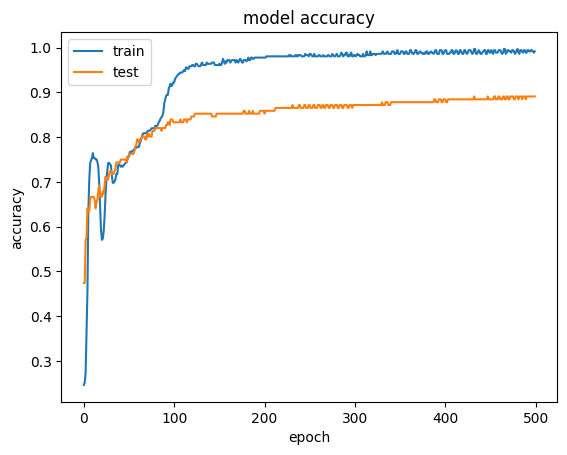

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()